In [549]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV

# Import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# ensemble
from sklearn.ensemble import RandomForestRegressor

# Set random seed.
np.random.seed(40)

In [550]:
df = pd.read_csv('../datasets/cleaned_data.csv')
df.head()

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
0,Afghanistan,AFG,74.750,99.169998,58.067580,11.792727,-314602.0,0.1,638.0,64.8,...,65.929134,43.448181,0.945227,27.710843,8.0,9.0,23.5,91.89,55.595550,0.509
1,Angola,AGO,35.161,103.419998,45.237371,3.930376,32066.0,1.9,241.0,80.6,...,44.686107,10.799292,2.507985,30.454545,36.0,36.0,23.5,55.50,23.916555,0.582
2,Albania,ALB,40.617,103.980003,42.670839,22.149635,-69998.0,0.1,15.0,9.4,...,125.710352,443.020376,1.108696,27.857143,5.0,5.0,16.0,149.54,104.870693,0.792
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.5,3.0,...,104.332411,3415.717495,1.430273,32.142857,13.0,13.0,23.5,2.01,163.823404,0.867
4,United Arab Emirates,ARE,13.752,104.180000,5.404112,0.626584,200000.0,0.1,3.0,7.2,...,208.978600,1285.099111,1.430273,22.500000,8.0,9.0,63.0,2899.67,133.584990,0.889


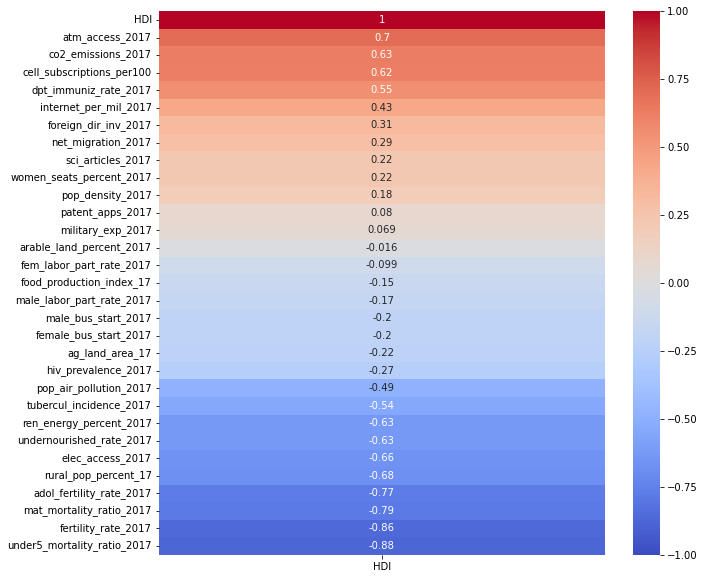

In [551]:
# distill features down
# comparing correlations of all numerical features to target 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[['HDI']].sort_values(by = 'HDI', ascending=False), 
            annot=True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm'); 

In [552]:
X = df.drop(columns=['Country Name', 'Country Code', 'HDI'])
y = df['HDI']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state= 42,
                                                   test_size = 0.4) # bigger test size to better evaluate model performance

In [553]:
X_train.shape

(112, 30)

In [554]:
X_test.shape

(75, 30)

In [555]:
# Scale Features
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train) 
X_test_ss = ss.transform(X_test)

------
#### Regularization to try to reduce overfitting of linear regression


In [556]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas = alphas, cv = 5)

# Fit model using best ridge alpha!
ridge_cv.fit(X_train_ss, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5)

In [557]:
ridge_cv.best_score_

0.8848043883725121

In [558]:
print(ridge_cv.score(X_train_ss, y_train))
print(ridge_cv.score(X_test_ss, y_test))

0.9286164947416222
0.9241084228384852


In [559]:
# Create the predictions for the "null model"
y_bar = np.mean(y)

# The null MSE
null_mse = np.mean((y - y_bar) ** 2)

null_mse

0.022715749606794584

In [560]:
# Lasso

# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3,0,100)
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = l_alphas)
# Fit model using best ridge alpha!
lasso_cv.fit(X_train_ss, y_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]))

In [561]:
print(lasso_cv.score(X_train_ss, y_train))
print(lasso_cv.score(X_test_ss, y_test))

0.915173004599493
0.9009089431961416


In [562]:
# distilling features using Lasso
lasso_coefs = lasso_cv.coef_
lasso_coefs = pd.Series(lasso_coefs, (X.columns))
lasso_coefs

rural_pop_percent_17          -0.020856
food_production_index_17      -0.001678
ag_land_area_17               -0.000000
arable_land_percent_2017      -0.000000
net_migration_2017             0.000000
hiv_prevalence_2017            0.000000
mat_mortality_ratio_2017      -0.011057
under5_mortality_ratio_2017   -0.044806
tubercul_incidence_2017       -0.000000
elec_access_2017              -0.000000
ren_energy_percent_2017       -0.000000
co2_emissions_2017             0.015311
pop_air_pollution_2017        -0.012698
foreign_dir_inv_2017           0.001600
atm_access_2017                0.012757
adol_fertility_rate_2017      -0.000099
fem_labor_part_rate_2017       0.000000
male_labor_part_rate_2017     -0.000000
fertility_rate_2017           -0.030817
dpt_immuniz_rate_2017          0.000000
undernourished_rate_2017      -0.008597
cell_subscriptions_per100      0.008196
internet_per_mil_2017          0.006501
military_exp_2017              0.000000
women_seats_percent_2017       0.000000


In [563]:
# picking out coefficients that are not zeroed out
lasso_coefs[lasso_coefs != 0].sort_values(ascending=False)

co2_emissions_2017             0.015311
atm_access_2017                0.012757
cell_subscriptions_per100      0.008196
internet_per_mil_2017          0.006501
foreign_dir_inv_2017           0.001600
adol_fertility_rate_2017      -0.000099
food_production_index_17      -0.001678
female_bus_start_2017         -0.004293
undernourished_rate_2017      -0.008597
mat_mortality_ratio_2017      -0.011057
pop_air_pollution_2017        -0.012698
rural_pop_percent_17          -0.020856
fertility_rate_2017           -0.030817
under5_mortality_ratio_2017   -0.044806
dtype: float64

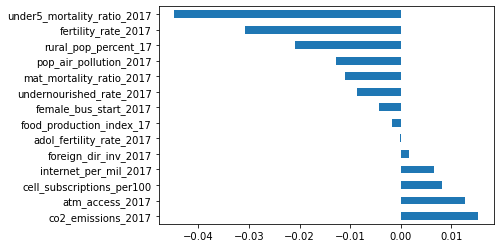

In [564]:
lasso_coefs[lasso_coefs != 0].sort_values(ascending=False).plot.barh();

In [565]:
# running linear regression with select features from lasso
features = ['co2_emissions_2017','atm_access_2017', 'cell_subscriptions_per100', 'internet_per_mil_2017','foreign_dir_inv_2017','adol_fertility_rate_2017',
            'food_production_index_17', 'female_bus_start_2017', 'undernourished_rate_2017', 'mat_mortality_ratio_2017', 'pop_air_pollution_2017', 
            'rural_pop_percent_17', 'fertility_rate_2017','under5_mortality_ratio_2017']
            
X = df[features]
y = df['HDI']

In [566]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size=0.2)

In [567]:
lr.fit(X_train, y_train)

LinearRegression()

In [568]:
lr.score(X_train, y_train)

0.9203660211748284

In [569]:
lr.score(X_test, y_test)

0.9455358370763265

In [570]:
# Create the predictions for the "null model"
y_bar = np.mean(y)

# The null MSE
null_mse = np.mean((y - y_bar) ** 2)

null_mse

0.022715749606794584

In [571]:
y_preds = lr.predict(X_test)
metrics.mean_squared_error(y_test, y_preds)

0.0013674051853593667

The model produces a lower MSE than the baseline. 

------

## Random Forest Regressor

In [572]:
# features = ['co2_emissions_2017','atm_access_2017', 'cell_subscriptions_per100', 'internet_per_mil_2017','foreign_dir_inv_2017','adol_fertility_rate_2017',
#             'food_production_index_17', 'female_bus_start_2017', 'undernourished_rate_2017', 'mat_mortality_ratio_2017', 'pop_air_pollution_2017', 
#             'rural_pop_percent_17', 'fertility_rate_2017','under5_mortality_ratio_2017']
# X = df[features]            
X = df.drop(columns=['Country Name', 'Country Code', 'HDI'])
y = df['HDI']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state= 42)

In [573]:
# instantiate RF Regressor
rf_reg = RandomForestRegressor()

In [574]:
rf_reg_params = {
    'n_estimators': [100,150,200,250],
    'max_depth': [None, 1,2,3,4,5,10],
    'min_samples_leaf': [2,4,6,8,10]
}

gs=GridSearchCV(rf_reg,
               param_grid = rf_reg_params,
               cv=5,
               n_jobs = -1)

gs.fit(X_train, y_train)

print(gs.best_score_)

rf_reg = gs.best_params_

0.9421374282336423


In [585]:
print(f'Training R-Squared: {gs.score(X_train, y_train)}')
print(f'Training R-Squared: {gs.score(X_test, y_test)}')

Training R-Squared: 0.9875720006412674
Training R-Squared: 0.9137739408392102


Random Forest is overfit compared to the OLS (with select Lasso features).

-----

In [529]:
# adding the development categorizations
df['development'] = df['HDI'].map(lambda x: 'low' if x < 0.55 else ('medium' if  x <= 0.699 else ('high' if x <= 0.799 else ('very high'))))

In [530]:
df.head()

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI,development
0,Afghanistan,AFG,74.750,99.169998,58.067580,11.792727,-314602.0,0.1,638.0,64.8,...,43.448181,0.945227,27.710843,8.0,9.0,23.5,91.89,55.595550,0.509,low
1,Angola,AGO,35.161,103.419998,45.237371,3.930376,32066.0,1.9,241.0,80.6,...,10.799292,2.507985,30.454545,36.0,36.0,23.5,55.50,23.916555,0.582,medium
2,Albania,ALB,40.617,103.980003,42.670839,22.149635,-69998.0,0.1,15.0,9.4,...,443.020376,1.108696,27.857143,5.0,5.0,16.0,149.54,104.870693,0.792,high
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.5,3.0,...,3415.717495,1.430273,32.142857,13.0,13.0,23.5,2.01,163.823404,0.867,very high
4,United Arab Emirates,ARE,13.752,104.180000,5.404112,0.626584,200000.0,0.1,3.0,7.2,...,1285.099111,1.430273,22.500000,8.0,9.0,63.0,2899.67,133.584990,0.889,very high


In [531]:
# Adding a range for each of the development categorizations for modeling
df['dev_tier'] = df['development'].map({'low': 0, 'medium': 1, 'high': 2, 'very high': 3})

In [532]:
df.head()

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI,development,dev_tier
0,Afghanistan,AFG,74.750,99.169998,58.067580,11.792727,-314602.0,0.1,638.0,64.8,...,0.945227,27.710843,8.0,9.0,23.5,91.89,55.595550,0.509,low,0
1,Angola,AGO,35.161,103.419998,45.237371,3.930376,32066.0,1.9,241.0,80.6,...,2.507985,30.454545,36.0,36.0,23.5,55.50,23.916555,0.582,medium,1
2,Albania,ALB,40.617,103.980003,42.670839,22.149635,-69998.0,0.1,15.0,9.4,...,1.108696,27.857143,5.0,5.0,16.0,149.54,104.870693,0.792,high,2
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.5,3.0,...,1.430273,32.142857,13.0,13.0,23.5,2.01,163.823404,0.867,very high,3
4,United Arab Emirates,ARE,13.752,104.180000,5.404112,0.626584,200000.0,0.1,3.0,7.2,...,1.430273,22.500000,8.0,9.0,63.0,2899.67,133.584990,0.889,very high,3


------
#### build classification model to predict development level 

# Log regression good for binary classification... 
# try KNN with select features from lasso
# try MNB
# try RF or other ensemble model

In [533]:
X = df.drop(columns=['Country Name', 'Country Code', 'HDI', 'development'])
y = df['dev_tier']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state= 42,
                                                   test_size = 0.4) # bigger test size to better evaluate model performance

In [534]:
# Scale Features
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train) 
X_test_ss = ss.transform(X_test)

In [535]:
# baseline classification model
df['dev_tier'].value_counts(normalize = True)

3    0.352941
2    0.272727
1    0.192513
0    0.181818
Name: dev_tier, dtype: float64

**Our baseline accuracy is 35.29%**

In [536]:
# Instantiate model
log = LogisticRegression()

# Fit model
log.fit(X_train_ss, y_train)

LogisticRegression()

In [537]:
print(f'Training Accuracy: {log.score(X_train_ss, y_train)}')
print(f'Test Accuracy: {log.score(X_test_ss, y_test)}')

Training Accuracy: 0.9821428571428571
Test Accuracy: 0.92


/Users/petermurphy/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


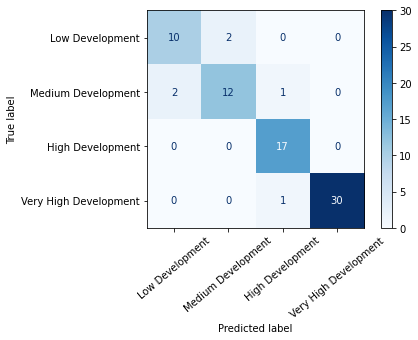

In [538]:
# Generate predictions.
preds = log.predict(X_test_ss)

# plot the confusion matrix
plot_confusion_matrix(log,
                      X_test_ss,
                      y_test,
                     cmap = 'Blues',
                     display_labels = ['Low Development', 'Medium Development','High Development','Very High Development'])

plt.xticks(rotation = 40);


In [542]:
# what does model struggle with?

In [543]:
preds = log.predict(X_test_ss)
f1_score(y_test, preds, average=None)

array([0.83333333, 0.82758621, 0.94444444, 0.98360656])

In [541]:
# other metrics to consider: f1 because we care about fn's and fp's all the same